# Student's Math Performances Analysis and Prediction

## Objective of this analysis
#### To find out how various parameters affect students performances in mathematics. (Parental level of study, Race/Ethnicity, Lunch, Gender and Test preparation course,)
#### To find out and predict how we can improve our students performances in math.

## What to do in our analysis
#### a). To analyse the insights in our data. 
#### b). To extruct the important variables.
#### c). Provide insights with suitable graphs and visualizations.
#### d). Write all our inferences with supporting annalysis and visualizations.

## Parameters
#### Race/Ethnicity - Race of the students
#### Lunch - Type/Kind of food the students took during lunch
#### Gender - Sex of the students
#### Test preparation course - Test taken in prior to an exam
#### Math score - Scores in math
#### Reading score - Scores in reading
#### Writing score - scores in writing
#### Parental level of education - Student's parents level of education

In [2]:
# Importing Various Libraries

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from matplotlib import pyplot as plt

## Reading our Data from the csv

In [13]:
Sp = pd.read_csv('StudentsPerformance.csv')
Sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
Sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Since we want  to just base my focus on Math score alone, we will drop the rest of the parameters not in use.

In [15]:
Sp = Sp.drop(['reading score','writing score'], 1)
Sp.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11552\3470157501.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Sp = Sp.drop(['reading score','writing score'], 1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


In [16]:
Sp.describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


## No. of values in each column parameter

In [17]:
Sp['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [18]:
Sp['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [19]:
Sp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [20]:
Sp['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [21]:
Sp['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

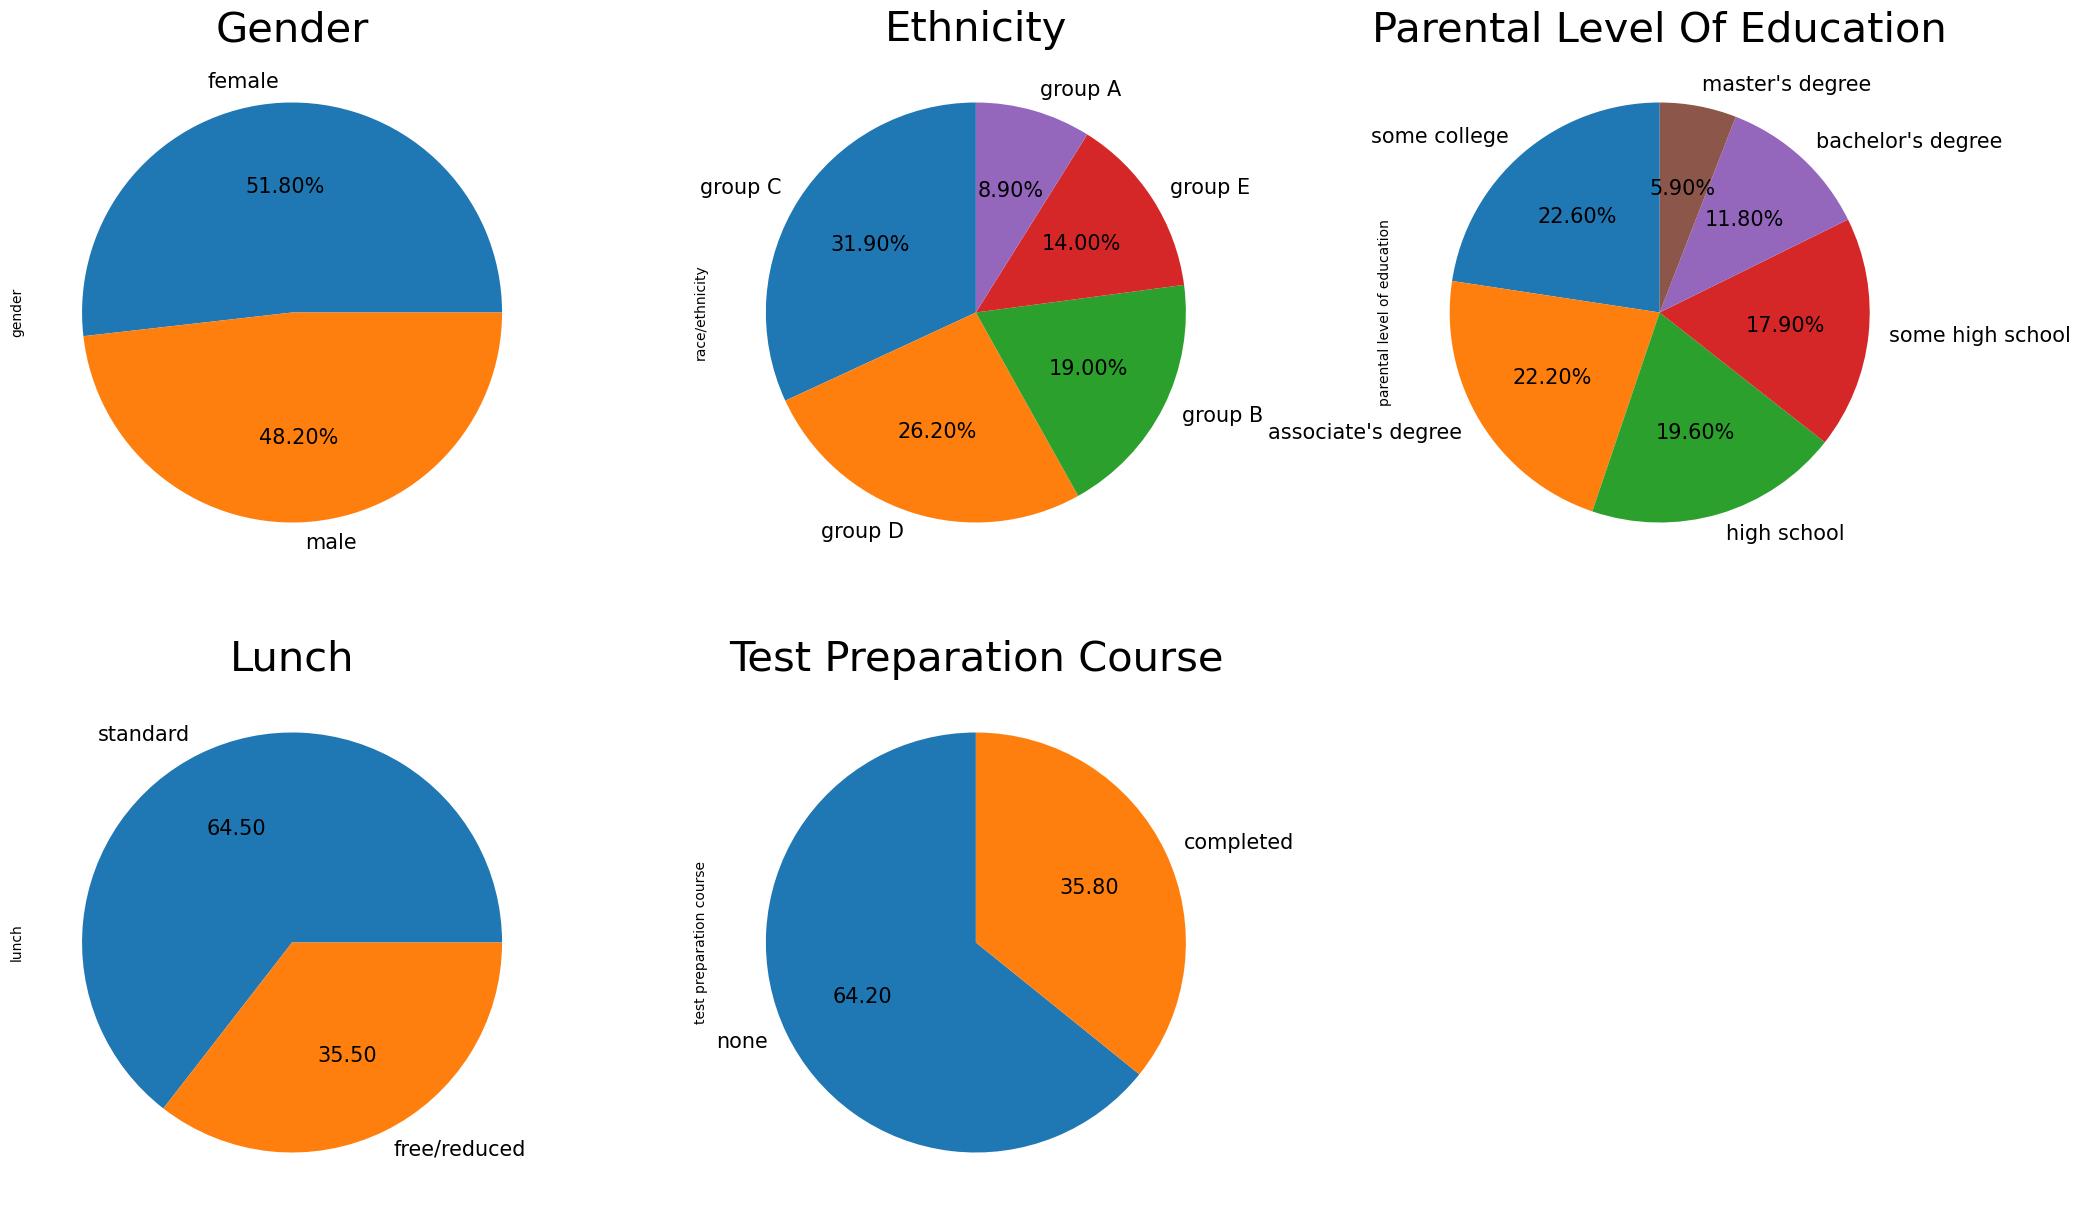

In [22]:
## Showing our data on the number of column parameters in pie charts

plt.figure(figsize=(25,15))

plt.subplot(231)
plt.title("Gender",fontsize=30)
Sp['gender'].value_counts().plot.pie(autopct="%.2f%%",fontsize=15)

plt.subplot(232)
plt.title("Ethnicity",fontsize=30)
Sp['race/ethnicity'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",fontsize=15)

plt.subplot(233)
plt.title("Parental Level Of Education",fontsize=30)
Sp['parental level of education'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",fontsize=15)

plt.subplot(234)
plt.title("Lunch",fontsize=30)
Sp['lunch'].value_counts().plot.pie(autopct="%.2f",fontsize=15)

plt.subplot(235)
plt.title("Test Preparation Course",fontsize=30)
Sp['test preparation course'].value_counts().plot.pie(startangle=90,autopct="%.2f",fontsize=15)

plt.show()

## Observations:
#### 1. Female students are slightly more than the male.
#### 2. Most of the students were from Ethnic Group C and only a few were from Group A.
#### 3. Most Student's parents had either some college degree or associate college degree.
#### 4. More than a half of the students took standard lunch compared to the rest who took either free or reduced lunch.
#### 5. Nearly half of the students completed a test preparation course.

## Finding the number of students who scored particular scores in maths

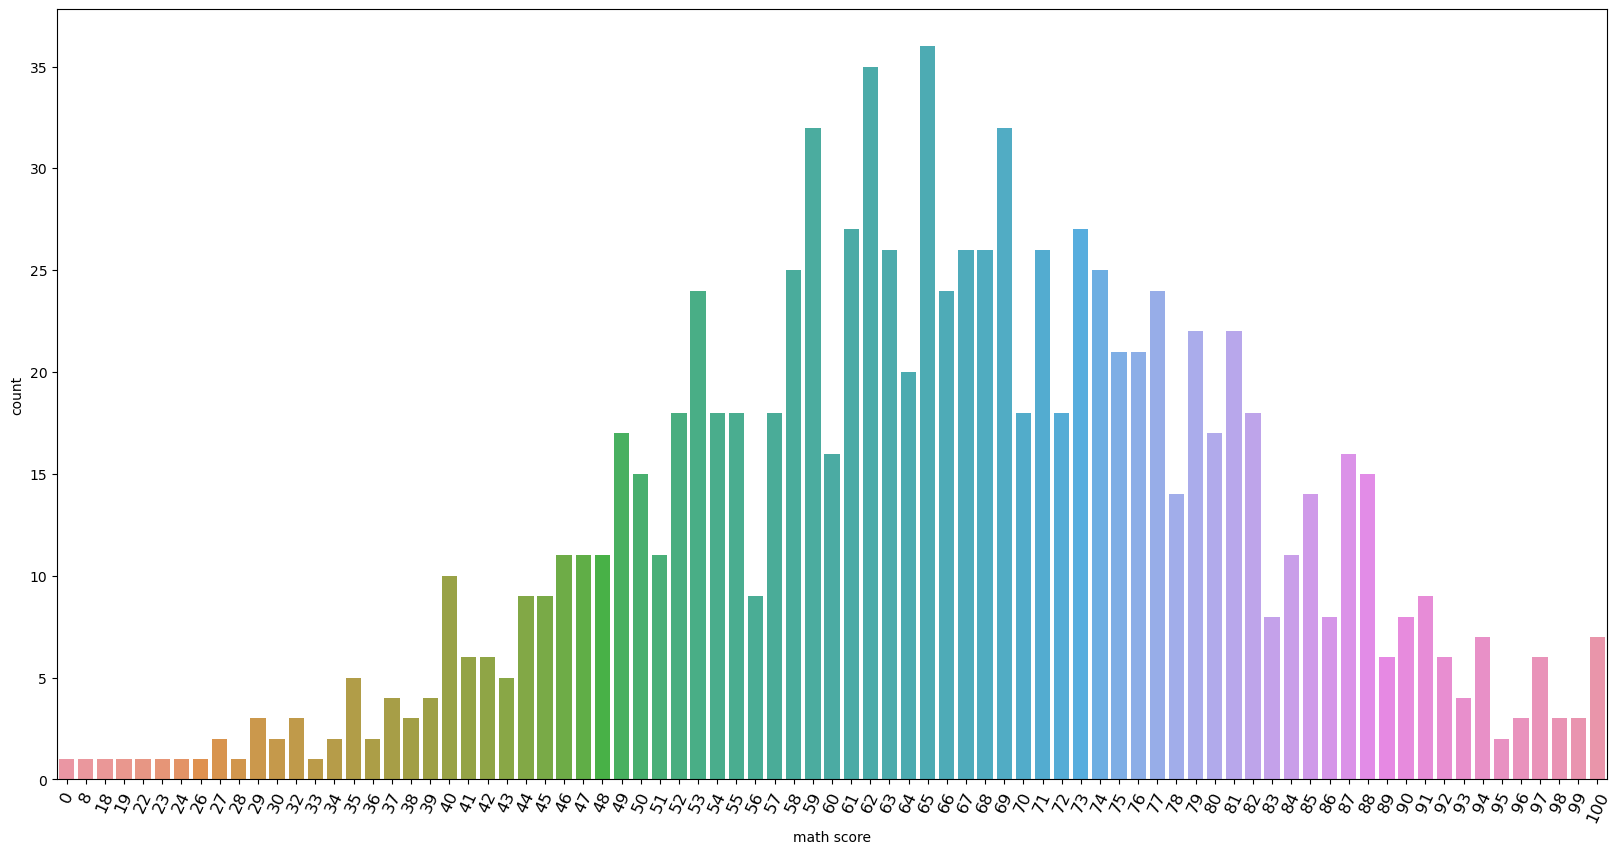

In [23]:
plt.figure(figsize=(20,10))
sb.countplot(x='math score',data=Sp)
plt.xticks(fontsize=12)
plt.xticks(rotation=65)
plt.show();


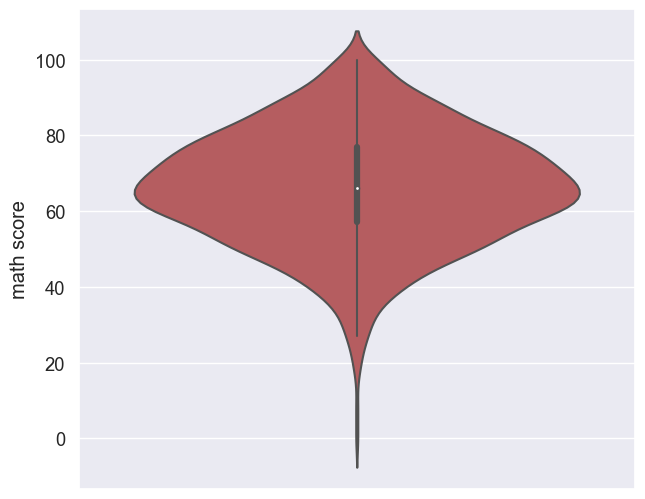

In [176]:
#plt.figure()
plt.subplots_adjust(top=1,bottom=0,right=3,left=1,wspace=0.3,hspace=0)
sb.set(font_scale=1.20)

plt.subplot(1,2,1)
sb.violinplot(y='math score',data=Sp, color = 'r');

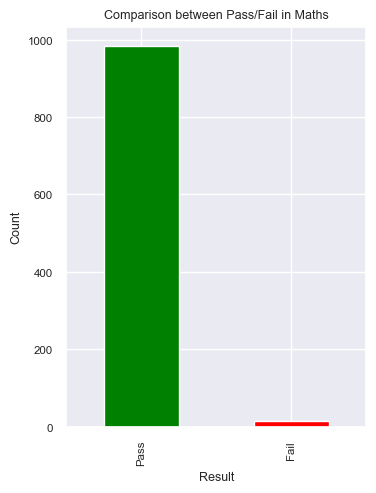

In [24]:
plt.subplots_adjust(top=2,bottom=0,right=4,left=1,wspace=0.5,hspace=0)
sb.set(font_scale=0.75)

passingmark=31
Sp['pass_math'] = np.where(Sp['math score']>= passingmark, 'Pass', 'Fail')
Sp['pass_math'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (1,2))

plt.title('Comparison between Pass/Fail in Maths')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
Sp['pass_math'].value_counts();

## Observations:
#### 1. Most of the students scored in the range of 60 - 80.
#### 2. Placing our passmark at 31, we find that a large number of students passed.

## Comparing math scores and other Parameters

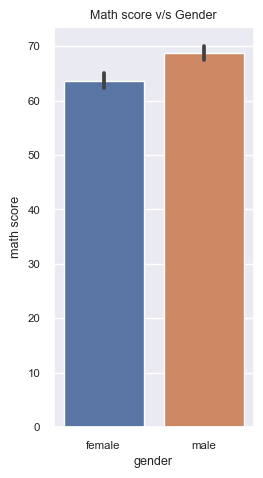

In [25]:
# We begin by comparing math score in terms of gender
plt.figure(figsize=(8,4))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)

plt.subplot(131)
plt.title("Math score v/s Gender")
sb.barplot(x="gender",y='math score',data=Sp);


## Observation:
#### 1. Male students performed better compared to Female students

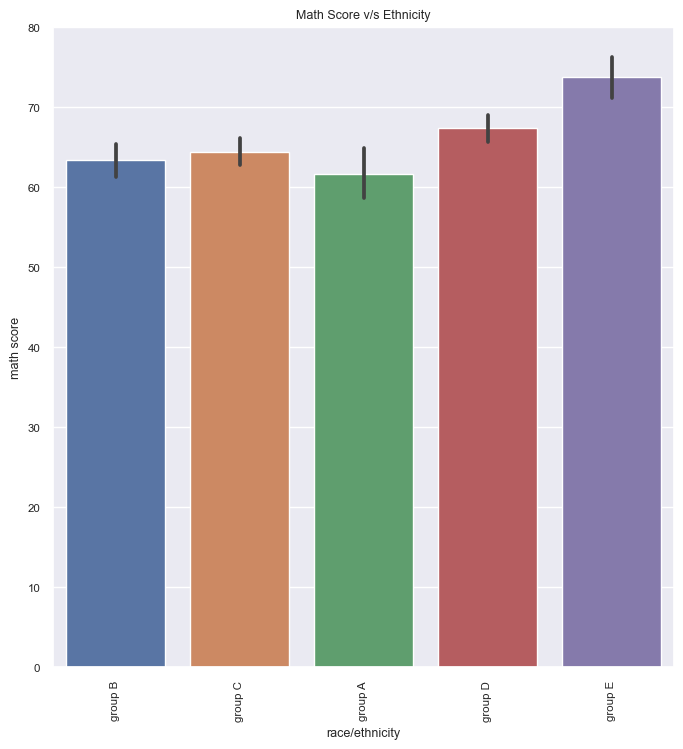

In [26]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9,  top=0.9, wspace=0.35,hspace=0.5)

plt.subplot()
plt.title("Math Score v/s Ethnicity")
sb.barplot(x='race/ethnicity',y='math score',data=Sp)
plt.xticks(rotation=90);


## Observations:
#### 1. Students belonging to Group E performed better.
#### 2. Students from Group A performed poorly.
#### 3. Students performances improved from group A, B, C, D, E respectively.

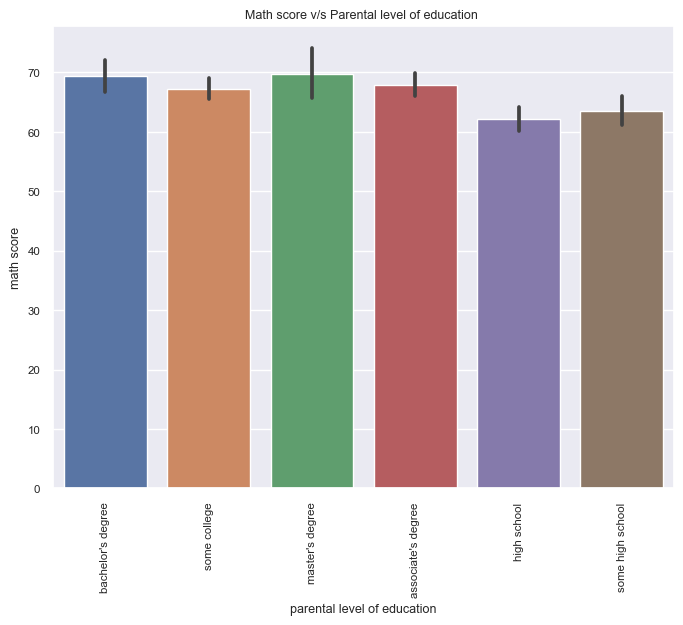

In [27]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=1,wspace=0.5)

plt.subplot()
plt.title("Math score v/s Parental level of education ")
sb.barplot(x='parental level of education',y="math score",data=Sp)
plt.xticks(rotation=90);


## Observations:
#### 1. Students whose parents had master's degree scored better, followed closely by these with bachelor's degree.
#### 2. Students whose parents only reached high school scored least.

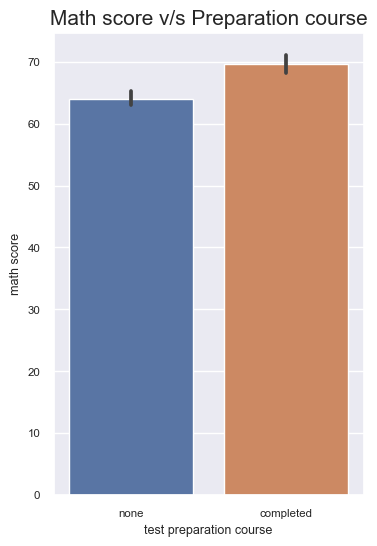

In [28]:
plt.figure(figsize=(4,6))
plt.subplots_adjust(wspace=0.5)

plt.subplot()
plt.title("Math score v/s Preparation course",fontsize=15)
sb.barplot(x='test preparation course',y='math score',data=Sp);

## Observations:
#### Students who completed a test preparation course performed better compared to those that took none.

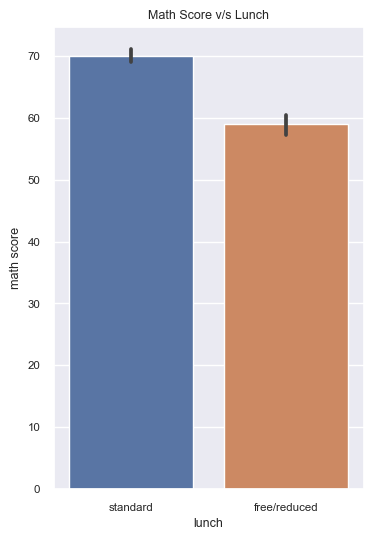

In [29]:
plt.figure(figsize=(4,6))
plt.subplots_adjust(wspace=0.1)

plt.subplot()
plt.title("Math Score v/s Lunch")
sb.barplot(x='lunch',y="math score",data=Sp);

## Observations:
#### 1. Students who had standard lunch scored better compared to the others who took free/reduced lunch.

## Checking which parameters affected students scores

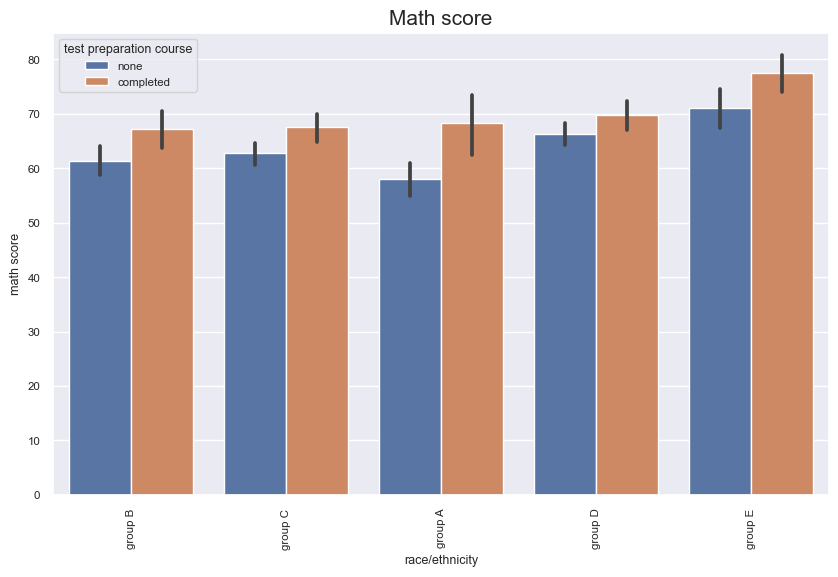

In [30]:
# Students score in comparision between test preparation course and race/ethnicity.
plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.25,hspace=0.8)

plt.subplot()
plt.title("Math score",fontsize=15)
sb.barplot(x='race/ethnicity',y='math score',hue='test preparation course',data=Sp)
plt.xticks(rotation=90);

## Observations:
#### 1. Students irrespective of their race, performed better if they completed the test preparation course.

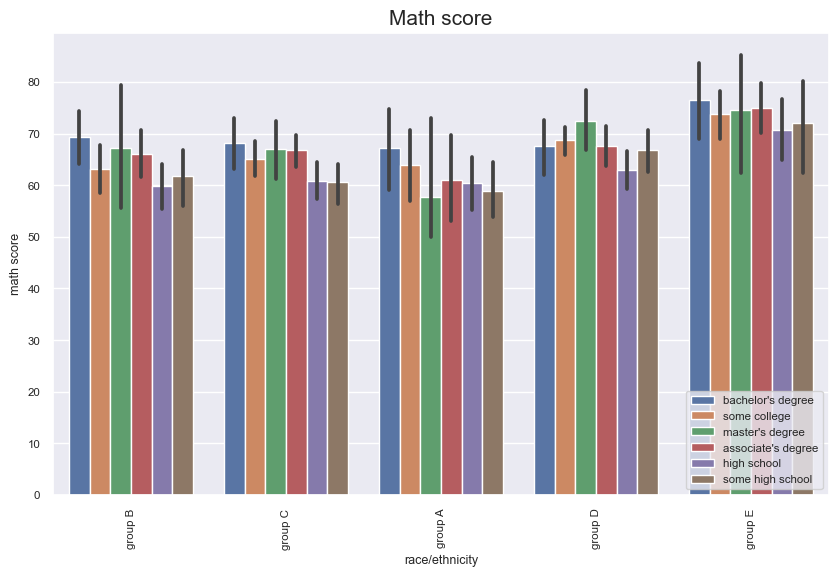

In [31]:
# students scores in regard to parental level of education and race/ethnicity.
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.4)

plt.subplot()
plt.title("Math score",fontsize=15)
sb.barplot(x='race/ethnicity',y='math score',hue='parental level of education',data=Sp)
plt.legend(loc='lower right')
plt.xticks(rotation=90);


## Observations:
#### 1. Students whose parents have bachelor's degree and belonging to ethnic group; A,B,C,E and those whose parents have master's degree and belonging to ethnic group D performed better respectively.

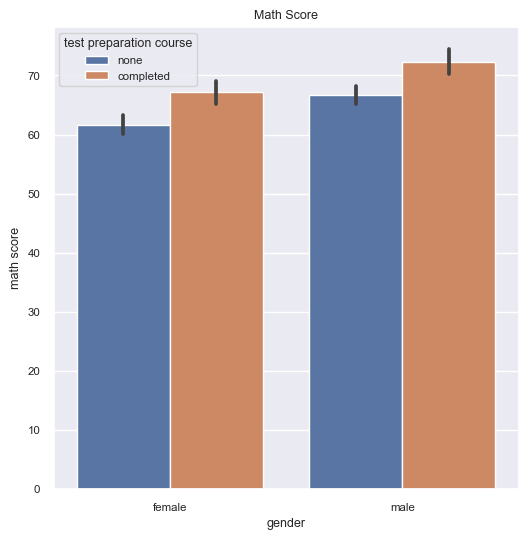

In [32]:
# students scores in comparing test preparation course with gender.
plt.figure(figsize=(6,6))
plt.subplots_adjust(wspace=0.05)

plt.subplot()
plt.title("Math Score")
sb.barplot(x="gender",y="math score",hue='test preparation course',data=Sp);

## Observations:
#### 1. Students irrespective of their gender performed better if they completed the test preparation course

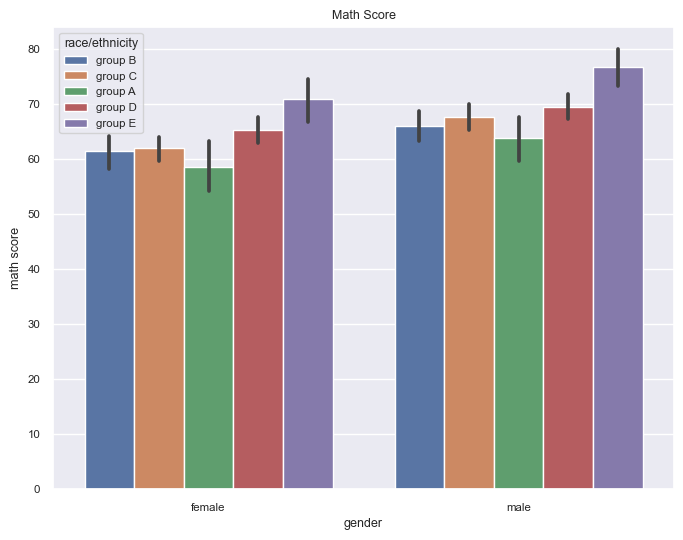

In [33]:
# students scores in regard to race/ethnicity and gender.
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.25,hspace=0.5)

plt.subplot()
plt.title("Math Score")
sb.barplot(x="gender",y="math score",hue='race/ethnicity',data=Sp);


## Observations:
#### 1. Both male and female students from ethnic group E scored better.

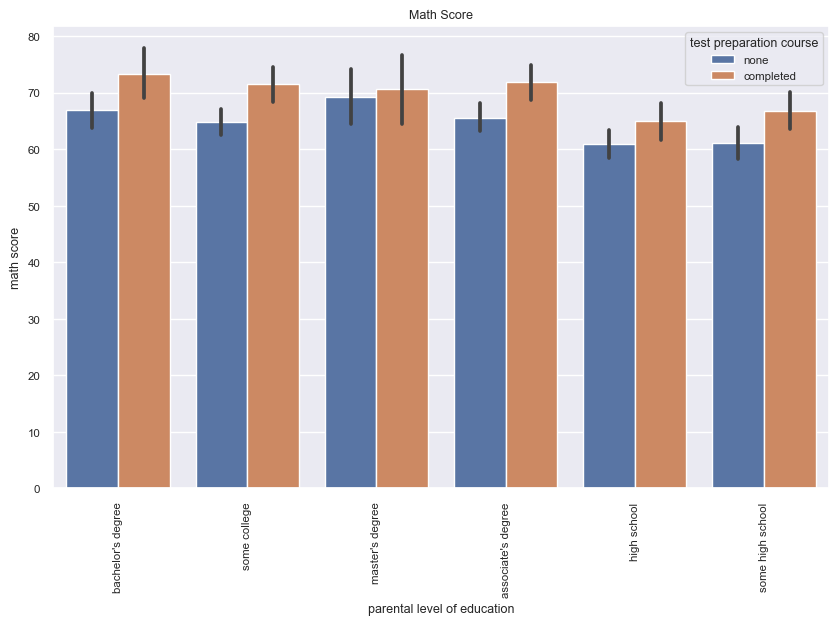

In [34]:
# Students scores in regard to test preparation course and parental level of education
plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.25,hspace=0.5)

plt.subplot()
plt.title("Math Score")
sb.barplot(x='parental level of education',y="math score",hue='test preparation course',data=Sp)
plt.xticks(rotation=90);

## Observations:
#### 1. Students performed better with respect to their parents level of education whether they completed the test preparation course or not.

## Finding out various parameters that affected test preparation course and how they affected its completion

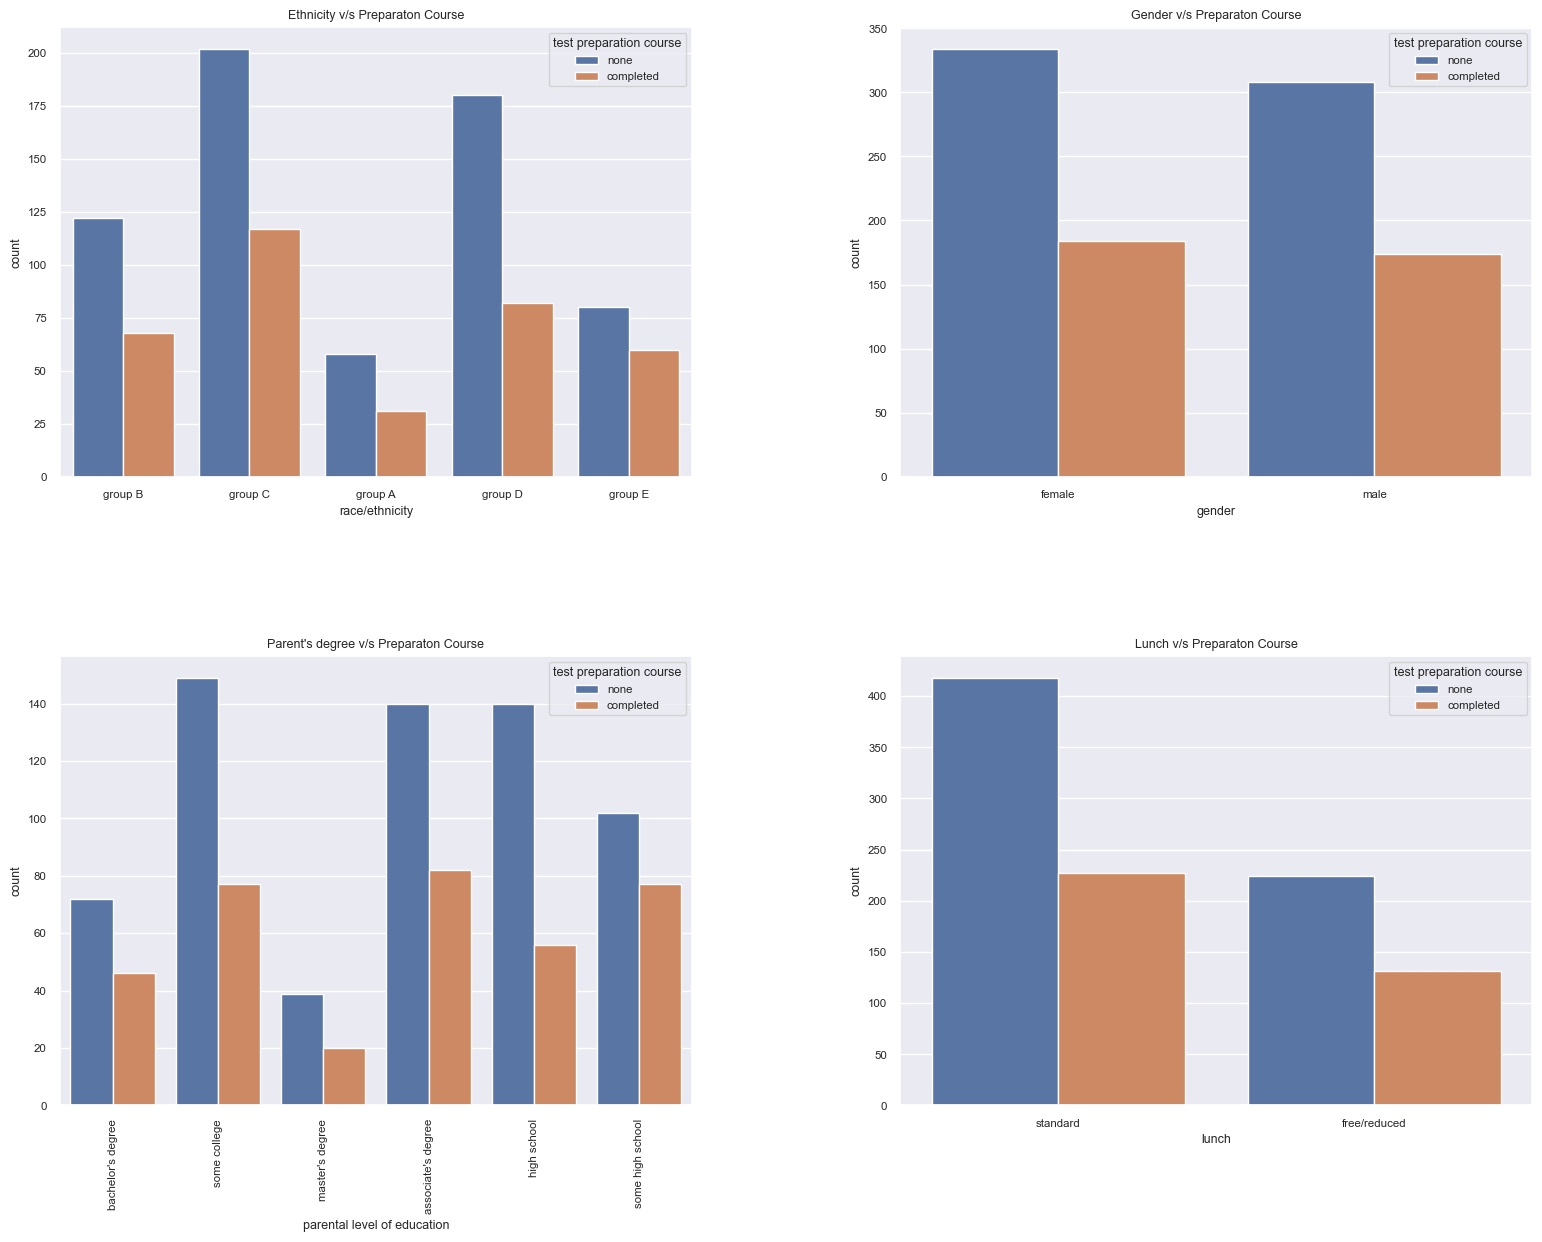

In [35]:
plt.figure(figsize=(19,14))
plt.subplots_adjust(wspace=0.33,hspace=0.4)

plt.subplot(2,2,1)
plt.title("Ethnicity v/s Preparaton Course")
sb.countplot(x='race/ethnicity',hue='test preparation course',data=Sp)

plt.subplot(2,2,2)
plt.title("Gender v/s Preparaton Course")
sb.countplot(x="gender",hue='test preparation course',data=Sp)

plt.subplot(2,2,3)
plt.title("Parent's degree v/s Preparaton Course")
sb.countplot(x="parental level of education",hue='test preparation course',data=Sp)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title("Lunch v/s Preparaton Course")
sb.countplot(x='lunch',hue='test preparation course',data=Sp)

plt.show()

## Observations:
#### 1.  **Gender:** - Most male and female students did not take the test preparation course
#### 2. **Parental level of study:** - Atleast those students whose parents level of study are some high school, master's degree and bachelor's degree respectively completed the test preparation course, while most of those whose parents level of study is associate's degree, high school and some college never completed the test preparation course.
#### 3. **Race/Ethnicity:** - A good number of students fron ethnic group E and A completed their test preparation course while very few from ethnic group B, C and D completed their test preparation course
#### 4. **Lunch** - More than half of the student who took free/redused lunch completed the test preparation course compared to those that took standard lunch.

## Parental level of study

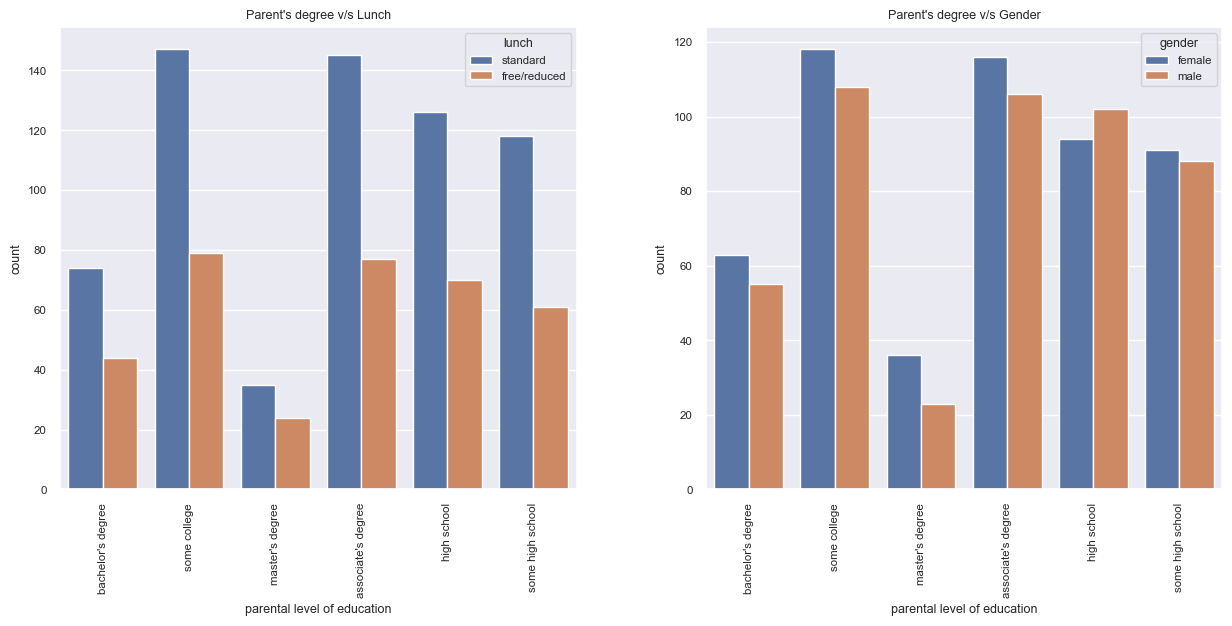

In [36]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
plt.title("Parent's degree v/s Lunch")
sb.countplot(x="parental level of education",hue='lunch',data=Sp)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Parent's degree v/s Gender")
sb.countplot(x="parental level of education",hue='gender',data=Sp)
plt.xticks(rotation=90)

plt.show()


## Observations:
#### 1. Most of the students whose parents are from across all the parental level of study took standard lunch
#### 2. Most of the female students have parents whose level of studies are bachelor's degree, some college, master's degree,associate degree or some high school. while most male students parental level of study is high school.

In [37]:
Sp.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11552\3281353949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Sp.corr()


,math score
math score,1.0


In [38]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

Sp['gender']=label_encoder.fit_transform(Sp['gender'])
Sp['race/ethnicity']=label_encoder.fit_transform(Sp['race/ethnicity'])
Sp['parental level of education']=label_encoder.fit_transform(Sp['parental level of education'])
Sp['lunch']=label_encoder.fit_transform(Sp['lunch'])
Sp['test preparation course']=label_encoder.fit_transform(Sp['test preparation course'])

Sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,pass_math
0,0,1,1,1,1,72,Pass
1,0,2,4,1,0,69,Pass
2,0,1,3,1,1,90,Pass
3,1,0,0,0,1,47,Pass
4,1,2,4,1,1,76,Pass


In [39]:
Sp.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11552\3281353949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Sp.corr()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11552\3906143783.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(Sp.corr(), cmap='RdBu', annot=True, square=True,


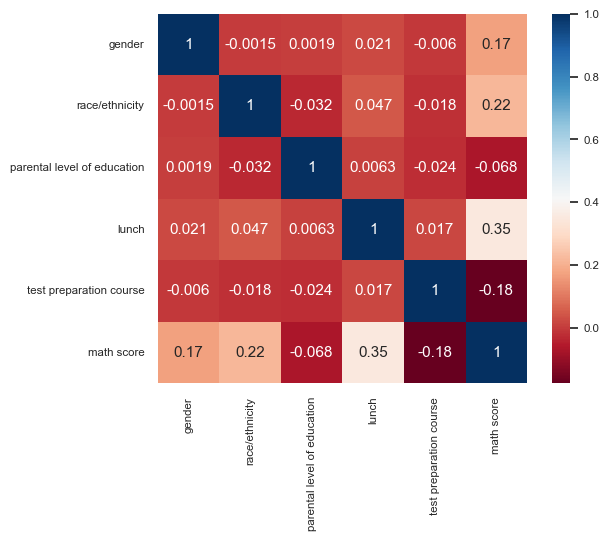

In [40]:
sb.heatmap(Sp.corr(), cmap='RdBu', annot=True, square=True, 
          annot_kws={'fontsize':11,'fontweight':11});

## Observations:
#### 1. Maths score was affected by race/ethnicity, lunch and gender.

## Conclusions and Findings

#### 1. From our analysis it clearly shows that the students that took a given kind of lunch performed either well enough compared to the ones who took another different kind, from this we are right to say that students score in math is kind of affected by the kind of lunch they have.

#### 2. The students who are from a given race  performed much better compared to the others therefore it is clear that somehow the ethnicity of these students mattered in their math score.

#### 3. Our analysis show that male students scored better compared to the female students. therefore it is clear that gender affected math score.

#### We can conclude by saying that the students score in math is hugely impacted by the type of lunch the students took, their race/ethnicity and finaly their gender. Since gender and race cannot be controled in either way but lunch can be controled. 
####     From this we can predict that for the students to have a better math score in the future they need an improvement on the kind of food they take for lunch.